## Problem statement:
1. European-based Mercedes-Benze is a premium automaker. Nearly 2000 patents are applied for annually by Benze, a pioneer in the premium automaker industry. customers can choose their car from a choice of customizing options and opinions.
2. In order to ensure the reliability and safety of the vehicle and its components, Strict testing methods are used by Benze on a variety of models and custom models to ensure their performance. It is very difficult with manual methods to optimize the test and test time spend on test procedures  for each customization option.
3. Using the various test feature combinations, we must determine the best test time and minimal carbon dioxide emission without compromising safety criteria.

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Metrics:
R² error (coefficient of Determination) : 1 -RSS/TSS

RSS = 	sum of squares of residuals
TSS	=	total sum of squares

When 
*   R² = 1 then the model is perfectly predicting
*   R² = 0 to 1 , model is not predicting prefectly but better than simple average model
*   R²  = 0 model is not predicting at all

In [6]:
#import required modules
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import time


# loading data

In [7]:
data  = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/train.csv')
data.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [8]:
data.columns

Index(['ID', 'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=378)

In [9]:
#shape of input data
data.shape

(4209, 378)

#### we have 4209 data samples with 377 features

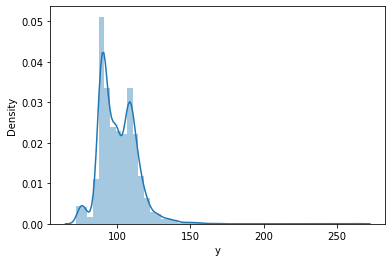

In [10]:
#know the distribution output varible
sns.distplot(data['y'])
plt.show()

### The data is more concentrate below 150, remain data we can consider as outliers

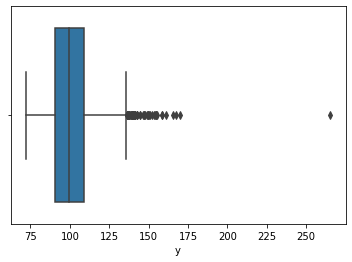

In [11]:
#ploting boxplot for output variable
sns.boxplot(data['y'])
plt.show()

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,4209.0,4205.960798,2437.608688,0.00,2095.00,4220.00,6314.00,8417.00
y,4209.0,100.669318,12.679381,72.11,90.82,99.15,109.01,265.32
X10,4209.0,0.013305,0.114590,0.00,0.00,0.00,0.00,1.00
X11,4209.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00
X12,4209.0,0.075077,0.263547,0.00,0.00,0.00,0.00,1.00
...,...,...,...,...,...,...,...,...
X380,4209.0,0.008078,0.089524,0.00,0.00,0.00,0.00,1.00
X382,4209.0,0.007603,0.086872,0.00,0.00,0.00,0.00,1.00
X383,4209.0,0.001663,0.040752,0.00,0.00,0.00,0.00,1.00
X384,4209.0,0.000475,0.021796,0.00,0.00,0.00,0.00,1.00


In [13]:
# check how many features are multiclass
mutlicalss_features = []
binary_features =[]
for col in data.drop(['y'],axis=1).columns:
    len = data[col].unique().shape[0]
    if len == 1:
        print(col,"single class")
    elif len == 2:
        binary_features.append(col)
        #print(col,"binary class")
    elif len > 2:
        mutlicalss_features.append(col)


X11 single class
X93 single class
X107 single class
X233 single class
X235 single class
X268 single class
X289 single class
X290 single class
X293 single class
X297 single class
X330 single class
X347 single class


In [14]:
print("Number of multi category features are :",mutlicalss_features.__len__())    


Number of multi category features are : 9


In [15]:
#checking for feautures having single value and droping that features
single_val_features = [col for col in data.columns if data[col].nunique() == 1]
print("Total number of single value features in data set is {}".format(single_val_features.__len__()))
print("Features having single values: ",single_val_features)


Total number of single value features in data set is 12
Features having single values:  ['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347']


In [16]:
# shape of dataset after droping the single value features
data.drop(single_val_features,axis =1,inplace=True)
data.shape

(4209, 366)

In [17]:
# checking the distribution of muticlass features
mutlicalss_features.remove('ID')

print(mutlicalss_features)


['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']


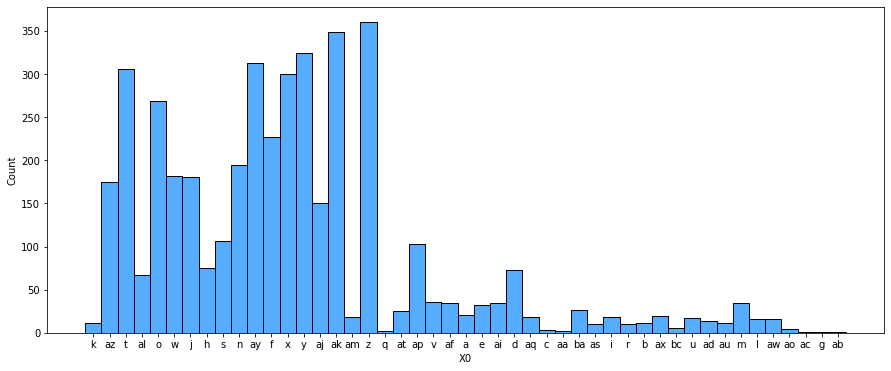

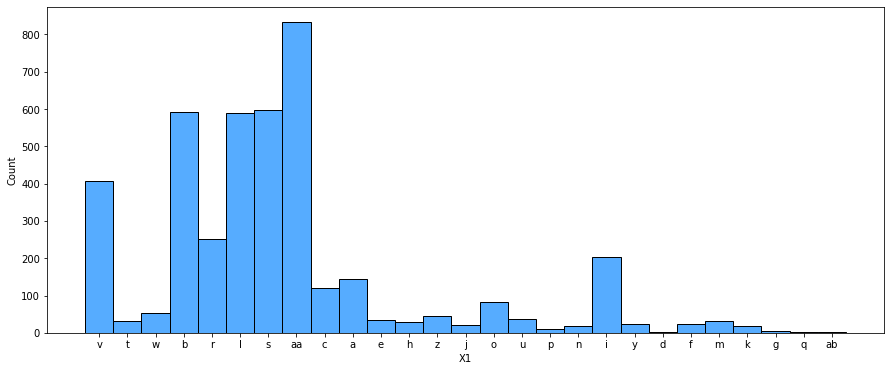

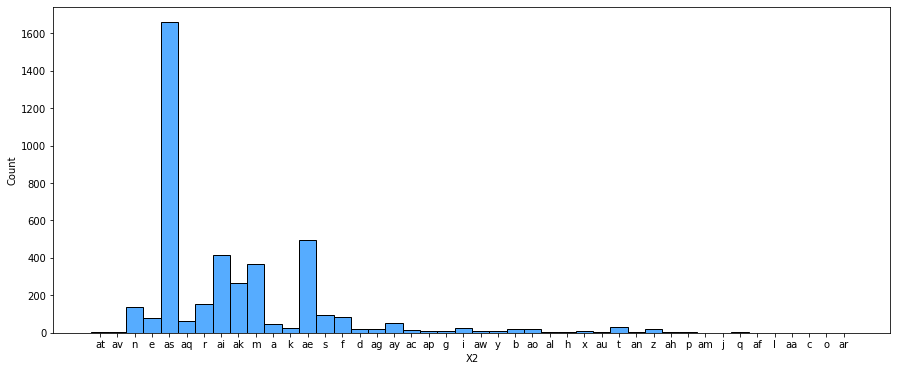

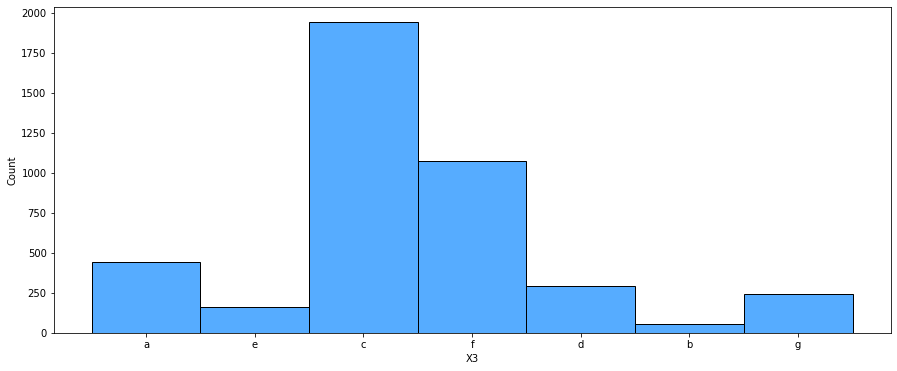

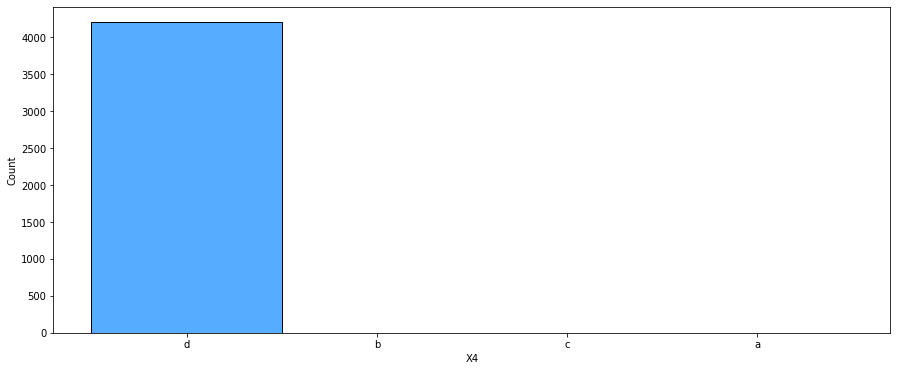

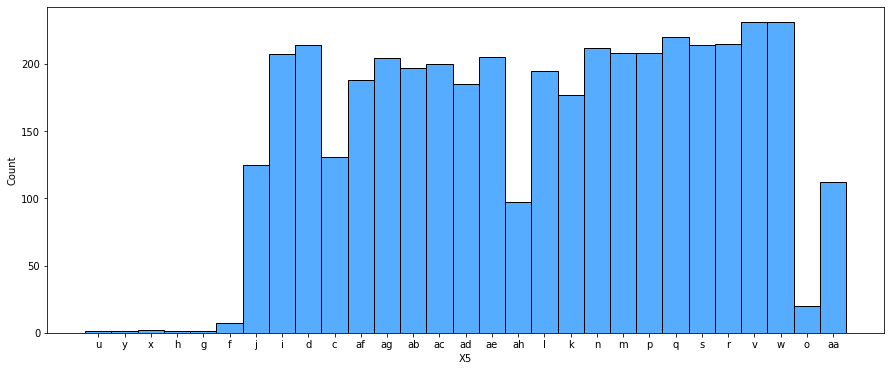

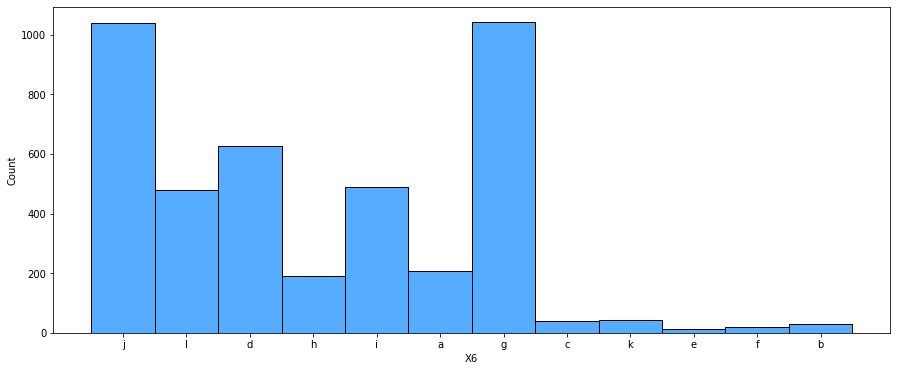

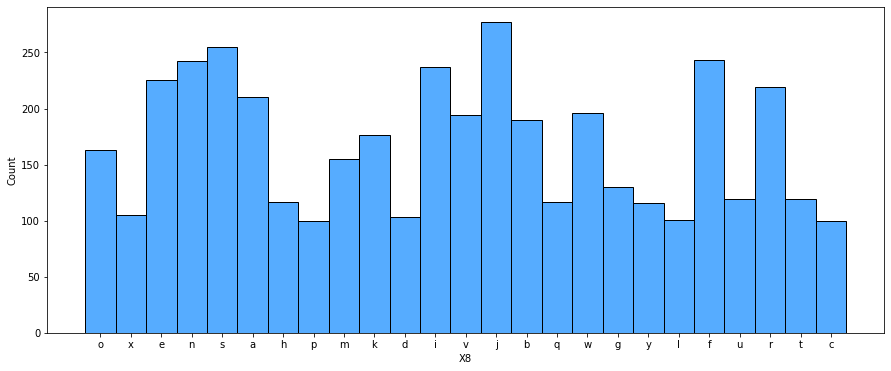

In [18]:
for clas in mutlicalss_features:
    plt.figure(figsize = (15,6))
    sns.histplot(x= clas,data = data,color = "dodgerblue")
    plt.show()

# observations:
### 1. the feature x4 amlost look like single variable feature
###  2. The features X3, X5 and X8 having almost having unifrom distributions

In [19]:
#for feature X4 is almost like single varible feature we can drop it
data.drop(['X4'],axis=1,inplace= True)

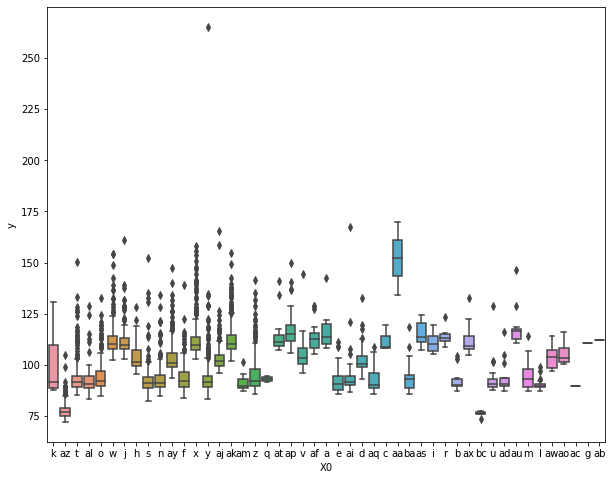

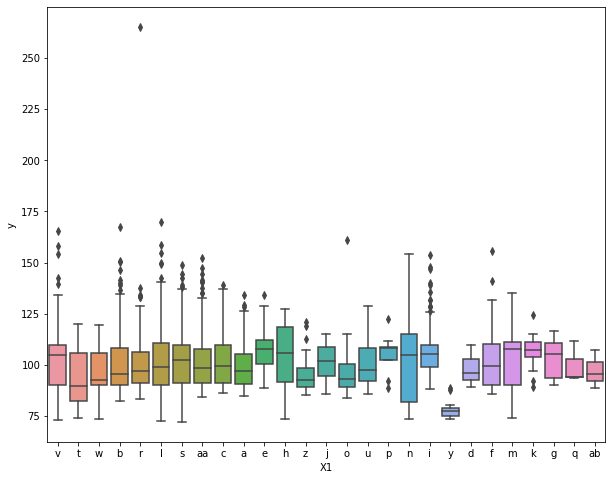

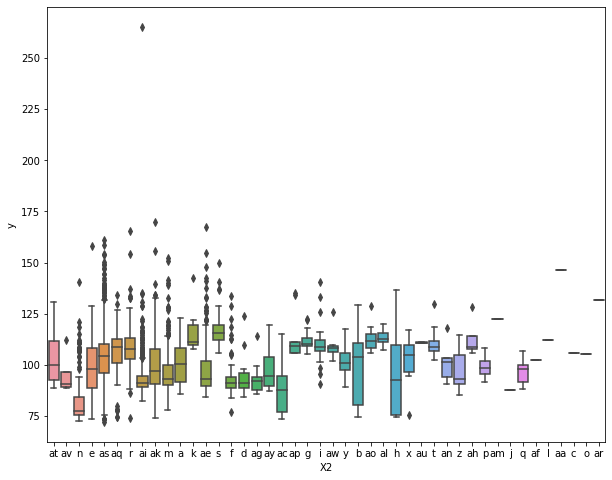

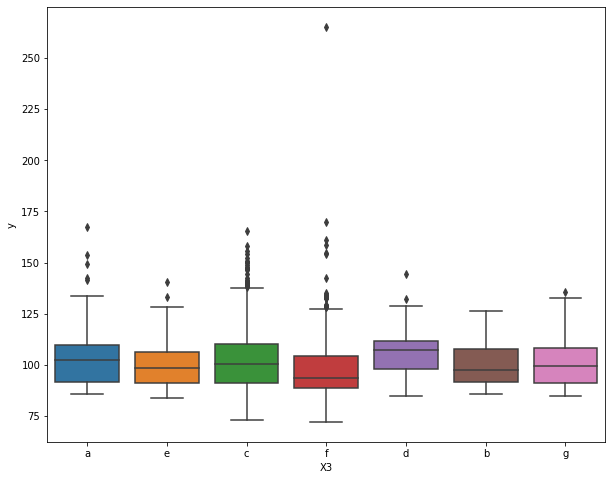

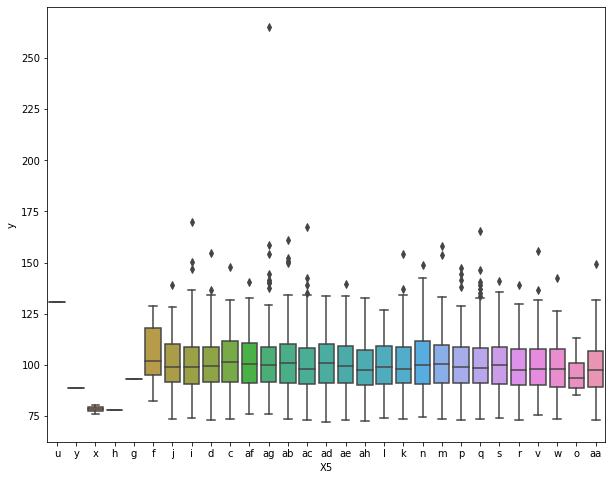

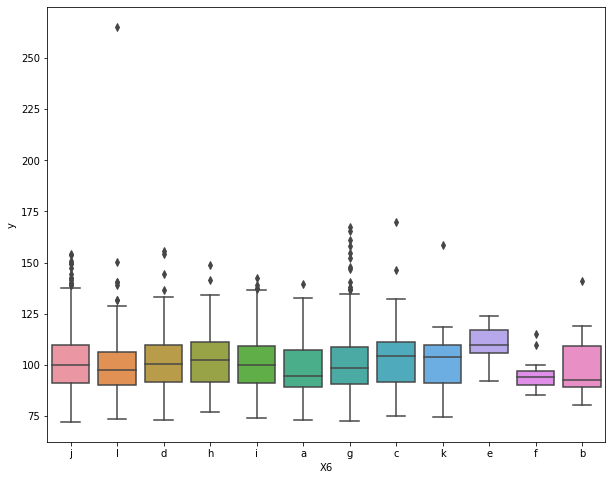

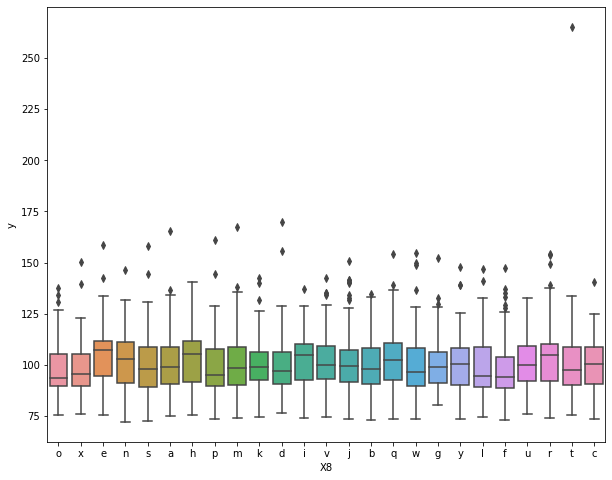

In [20]:
#checking the covariance between the multi category features and output variable
for col in ['X0', 'X1', 'X2', 'X3', 'X5', 'X6', 'X8']:
    plt.figure(figsize=(10,8))
    sns.boxplot(x= col,y = 'y',data =data)
    plt.show()

 

# observations:
#### 1. some categories in 'X0' feature can be eaily classified
#### 2. In other features , categories are overlapped with each other

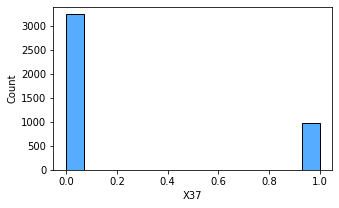

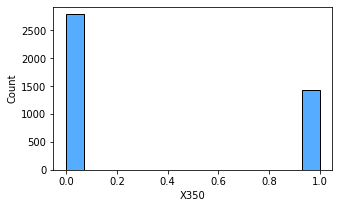

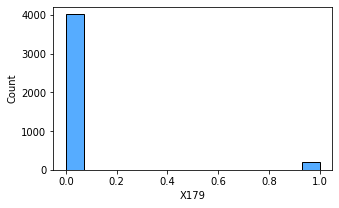

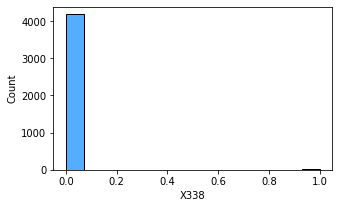

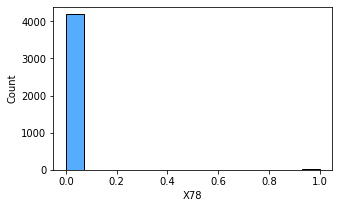

In [21]:
# Since we have more binary features we cannot anlysis all features 
# randomly checking the counts of binary classes in some features

for col in random.choices(binary_features, k=5):
    plt.figure(figsize=(5,3))
    sns.histplot(x= col,data = data,color = "dodgerblue")
    plt.show()

# observations:
#### Most of the features has unbalanced distributions, by analysing in more detail some features can be droped for dimensional reduction.

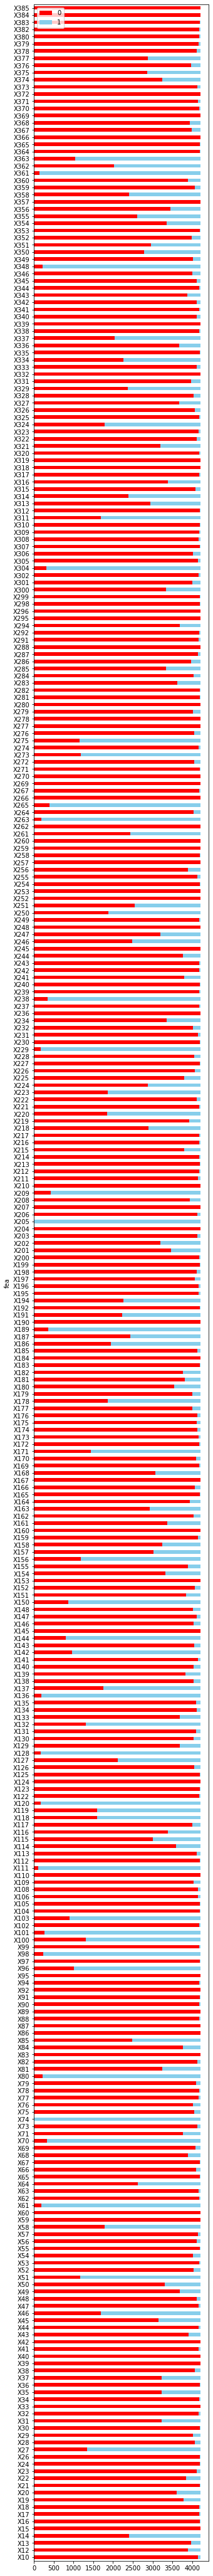

In [22]:
df2 = data.loc[:,binary_features] 
a = []
for col in df2.columns:
    counts  = df2[col].value_counts()
    #print(counts)
    a.append([col,counts[0],counts[1]])
    
df3 = pd.DataFrame(np.array(a),columns=['fea', '0', '1'])
df3.set_index('fea',inplace=True)
df3 =df3.astype(int)

df3.plot(kind='barh', stacked=True, color=['red', 'skyblue'],figsize =(5,75))


#### By seeing the distributions of binary features, some features having very high distribution of one value. Therefore the feaures having one value very high disrubution is droped form the dataset to reduce the dimenionality


In [23]:
# droping the features from dataset
single_val_feat_from_bin = []
for feat in binary_features:
    count = data[feat].value_counts()
    zeros = np.round(count[0]*100/(count[0]+count[1]),2)
    ones = np.round(count[1]*100/(count[0]+count[1]),2)
    if ones <= 1.0 or zeros <=1.0 :
        single_val_feat_from_bin.append(feat)
        
data = data.drop(single_val_feat_from_bin,axis =1)

print("Shape of final dataset is ",data.shape)

Shape of final dataset is  (4209, 230)


# Data preprocessing

In [24]:
# before preprocessing the data , split data into train and cross validation
from sklearn.model_selection import train_test_split
X= data.drop(['y','ID'],axis =1)
Y = data['y']

#spliting data
X_train, X_cv,y_train,y_cv = train_test_split(X,Y,test_size =0.2,random_state =42)

print("train data size",X_train.shape)
print("cross validation data size",X_cv.shape)

train data size (3367, 228)
cross validation data size (842, 228)


#### Encoding the categorical features

In [25]:
# checking the number of categorival features

cat_list = data.drop(['y'],axis=1).select_dtypes(['object']).columns

In [26]:
print("Number if categorical features are :",cat_list.shape[0])

Number if categorical features are : 7


In [27]:
# Encoding this features by appling onehot encoding

from sklearn.preprocessing import OneHotEncoder

encode = OneHotEncoder(sparse = False,handle_unknown = "ignore")
encode.fit(X_train[cat_list])
x_train_cat_encd = encode.transform(X_train[cat_list])
x_cv_cat_encd = encode.transform(X_cv[cat_list])


In [28]:
x_train_cat_encd  =pd.DataFrame(x_train_cat_encd,columns=encode.get_feature_names()) 
x_train_cat_encd.set_index(X_train.index,inplace=True)
x_train_cat_encd.head()

x_cv_cat_encd  =pd.DataFrame(x_cv_cat_encd,columns=encode.get_feature_names()) 
x_cv_cat_encd.set_index(X_cv.index,inplace=True)

In [29]:
# select the top 50 features using select best k from all encoded features
from sklearn.feature_selection import SelectKBest,f_regression
kbest = SelectKBest(score_func=f_regression,k = 50)
kbest.fit(x_train_cat_encd,y_train)

X_train_kbest = kbest.transform(x_train_cat_encd)

In [30]:
# get the indices of top 50 features
kbest.get_support(indices= True)

#datafram of top 5o encoded feaures
#x_train_cat_encd.columns[kbest.get_support(indices= True)]
x_train_top_50_df  = x_train_cat_encd.iloc[:,kbest.get_support(indices= True)]
x_train_top_50_df.head()

x_cv_top_50_df  = x_cv_cat_encd.iloc[:,kbest.get_support(indices= True)]


In [31]:
X_train.drop(cat_list,axis=1,inplace = True)
X_train_fin = pd.concat([X_train,x_train_top_50_df],axis=1)
X_train_fin.head()

X_cv.drop(cat_list,axis=1,inplace = True)
X_cv_fin = pd.concat([X_cv,x_cv_top_50_df],axis=1)


# Machine learning models

#### creating a base model from linear regression for refrence

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

ref_model = LinearRegression()
ref_model.fit(X_train_fin,y_train)
y_pred_train = ref_model.predict(X_train_fin)

print("Train r2 score",round(r2_score(y_pred_train,y_train),3))
print("Train mean square error",round(mean_squared_error(y_pred_train,y_train),))


#predict using cross validation data
y_pred_cv = ref_model.predict(X_cv_fin)
print("===================================================")
print("cross validation r2 score",round(r2_score(y_pred_cv,y_cv),3))
print("cross validation mean square error",round(mean_squared_error(y_pred_cv,y_cv),3))

Train r2 score 0.328
Train mean square error 65
cross validation r2 score -0.001
cross validation mean square error 6.798655774927834e+23


## Model-1(SGD regression with hyperparamter tuning)

In [33]:
from sklearn.linear_model import SGDRegressor

alpha = [10**i for i in range(-4,4)]

param = {'alpha':alpha,'penalty':['l1','l2'] }
lr_reg  = SGDRegressor(random_state=42)
lr_gsv =GridSearchCV(lr_reg,param,scoring= 'r2',cv =5, n_jobs= -1,return_train_score=True)

lr_gsv.fit(X_train_fin,y_train)


GridSearchCV(cv=5, estimator=SGDRegressor(random_state=42), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             return_train_score=True, scoring='r2')

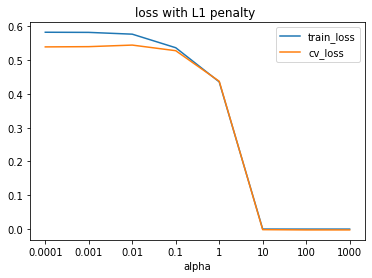

In [34]:
# ploting the loss with l1 regularization
train_score= lr_gsv.cv_results_['mean_train_score'][::2]
CV_score = lr_gsv.cv_results_['mean_test_score'][::2]

plt.plot(range(0,8),train_score,label = 'train_loss')
plt.plot(range(0,8),CV_score,label = 'cv_loss')
plt.legend()
plt.xlabel("alpha")
plt.xticks(range(0,8),alpha)
plt.title("loss with L1 penalty ")
plt.show()

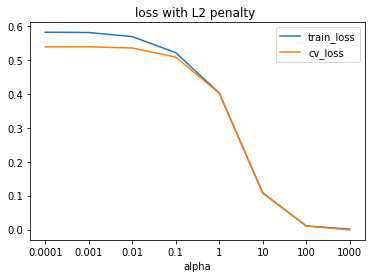

In [35]:
# ploting the loss with l2 regularization
train_score= lr_gsv.cv_results_['mean_train_score'][1:16:2]
CV_score = lr_gsv.cv_results_['mean_test_score'][1:16:2]

plt.plot(range(0,8),train_score,label = 'train_loss')
plt.plot(range(0,8),CV_score,label = 'cv_loss')
plt.legend()
plt.xlabel("alpha")
plt.xticks(range(0,8),alpha)
plt.title("loss with L2 penalty ")
plt.show()

In [36]:
print("Best parameters:",lr_gsv.best_params_)
print("Best score: ",lr_gsv.best_score_)


Best parameters: {'alpha': 0.01, 'penalty': 'l1'}
Best score:  0.5444287766862654


In [41]:

# train model on best parameter
lr_reg  =SGDRegressor(random_state=42,alpha =  0.01, penalty = 'l1')
lr_reg.fit(X_train_fin,y_train)

pred_train = lr_reg.predict(X_train_fin)
score_tr = r2_score(y_train,pred_train)

print("r2 score for train set with best model:",round(score_tr,3))

pred = lr_reg.predict(X_cv_fin)
score = r2_score(y_cv,pred)

print("r2 score for cv set wiht best model:",round(score,3))

r2 score for train set with best model: 0.575
r2 score for cv set wiht best model: 0.589


##### observations:
compare to the reference model,SGD regressor has given good results

# SVM(Regression)

In [42]:
%%time
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
alpha = [10**i for i in range(-4,4)]
para = {'kernel':['linear','rbf'],'C':alpha,
        'gamma': [1, 0.1, 0.01]}  

svm_reg = SVR()
svm_gsv = RandomizedSearchCV(svm_reg,para,scoring = 'r2',cv=5)
svm_gsv.fit(X_train_fin,y_train)

print("Best parameters:",svm_gsv.best_params_)
print("Best score: ",svm_gsv.best_score_)



Best parameters: {'kernel': 'linear', 'gamma': 0.1, 'C': 1}
Best score:  0.5273446029327321
CPU times: user 6min 34s, sys: 545 ms, total: 6min 35s
Wall time: 6min 44s


In [67]:
# train the svr with the best parameters
svm_reg = SVR(kernel= 'linear', gamma=0.1, C = 1)
svm_reg.fit(X_train_fin,y_train)

pred_train = lr_reg.predict(X_train_fin)
score_tr = r2_score(y_train,pred_train)

print("r2 score for train set with best model:",round(score_tr,3))

pred = lr_reg.predict(X_cv_fin)
score = r2_score(y_cv,pred)

print("r2 score for cv set wiht best model:",round(score,3))


r2 score for train set with best model: 0.575
r2 score for cv set wiht best model: 0.589


# Decision tree

In [68]:
from sklearn.tree import DecisionTreeRegressor
para = {'max_features':['auto', 'sqrt', 'log2'],
        'max_depth':[ 5, 10,12,15,20,25,30],
        'min_samples_split': [2, 3, 5],
        'min_samples_leaf': [1,5,8,10,20,30] }



df_reg = DecisionTreeRegressor(random_state= 42)
df_rsv = RandomizedSearchCV(df_reg,para,scoring='neg_mean_squared_error',cv =5,n_iter=20)
df_rsv.fit(X_train_fin,y_train)

print(df_rsv.best_params_)


{'min_samples_split': 3, 'min_samples_leaf': 8, 'max_features': 'auto', 'max_depth': 5}


In [70]:
# train the model with best parameter

dt_best  = DecisionTreeRegressor(min_samples_split= 3, min_samples_leaf= 8 ,max_features= 'auto', max_depth= 5,random_state= 42)
dt_best.fit(X_train_fin,y_train)

pred_train = dt_best.predict(X_train_fin)
print("R2 score for best model for train data",r2_score(y_train,pred_train).round(3))

pred_cv = dt_best.predict(X_cv_fin)
print("R2 score for best model for cv data",r2_score(y_cv,pred_cv).round(3))




R2 score for best model for train data 0.573
R2 score for best model for cv data 0.592


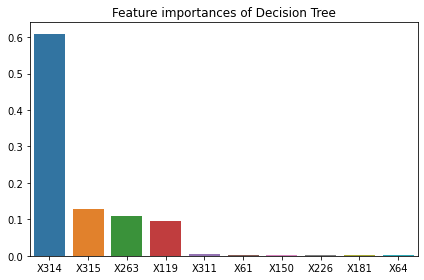

In [49]:
import seaborn as sns
importace= dt_best.feature_importances_
feature_names= dt_best.feature_names_in_
forest_importances = pd.Series(importace, index=feature_names)
a = forest_importances.sort_values(ascending=False)[0:10]


#plt.figure(figsize =(8,10))
sns.barplot(x = a.index,y = a.values)
plt.title("Feature importances of Decision Tree")
plt.tight_layout()

# Random forest regressor

In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
para = { 'n_estimators' :[5,10,15,20,50,100,200,500,1000],
        'max_features':['auto', 'sqrt', 'log2'],
        'max_depth':[ 5, 10,12,15,20,25,30],
        'min_samples_split': [2, 3, 5],
        'min_samples_leaf': [1,5,8,10,20,30] }



rf_reg = RandomForestRegressor(random_state= 42)
rf_rsv = RandomizedSearchCV(rf_reg,para,scoring='neg_mean_squared_error',cv =5,n_iter=30)
rf_rsv.fit(X_train_fin,y_train)

print(rf_rsv.best_params_)

{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': 'auto', 'max_depth': 5}


In [56]:
# train the random forest with best parameters

rf_best = RandomForestRegressor(n_estimators= 200, min_samples_split= 5, min_samples_leaf=5, max_features='auto', max_depth= 5,random_state= 42)
rf_best.fit(X_train_fin,y_train)


pred_train = dt_best.predict(X_train_fin)
print("R2 score for best model for train data",r2_score(y_train,pred_train).round(3))

pred_cv = dt_best.predict(X_cv_fin)
print("R2 score for best model for cv data",r2_score(y_cv,pred_cv).round(3))

R2 score for best model for train data 0.588
R2 score for best model for cv data 0.566


# XGboost model

In [57]:
%%time 
from xgboost import XGBRegressor


# A parameter grid for XGBoost
params = {
    'n_estimators':[10,20,30,50,100,200,500], 
    'gamma':[i/10.0 for i in range(3,6)],  
    'subsample':[i/10.0 for i in range(6,11)],
    'colsample_bytree':[i/10.0 for i in range(6,11)], 
    'max_depth': [2,3,4,6,7],
    'objective': ['reg:squarederror', 'reg:tweedie'],
    'booster': ['gbtree'],
    'eval_metric': ['rmse'],
    'eta': [i/10.0 for i in range(3,6)],
}

reg = XGBRegressor(nthread=-1)

# run randomized search
n_iter_search = 10
random_search = RandomizedSearchCV(reg, param_distributions=params,
                                   n_iter=n_iter_search, cv=5, scoring='r2')

start = time.time()
random_search.fit(X_train_fin, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))

RandomizedSearchCV took 103.11 seconds for 10 candidates parameter settings.
CPU times: user 3min 20s, sys: 627 ms, total: 3min 21s
Wall time: 1min 43s


In [59]:
best_regressor = random_search.best_estimator_
best_regressor


XGBRegressor(colsample_bytree=0.9, eta=0.3, eval_metric='rmse', gamma=0.4,
             max_depth=2, n_estimators=200, nthread=-1, objective='reg:tweedie',
             subsample=0.8)

In [62]:
# Get predictions
y_pred_train = best_regressor.predict(X_train_fin)
r2score = r2_score(y_train, y_pred_train).round(3)
print("R2 score after train with best parameters for trainset:" ,r2score )

y_pred_cv = best_regressor.predict(X_cv_fin)
r2score = r2_score(y_cv, y_pred_cv).round(3)
print("R2 score after train with best parameters for cv set:" ,r2score )




R2 score after train with best parameters for trainset: 0.582
R2 score after train with best parameters for cv set: 0.595


In [78]:

from prettytable import PrettyTable
pt = PrettyTable(hrules = True)

pt.field_names = ["SL NO", "Model", "Hyperparamter", "Train R2 score","Cv R2 score"]
pt.add_rows([
["1", "Linear Regression(Base model)","Nil",0.332,-0.001 ],
["2", "SGD REgression","alpha =  0.01, penalty = 'l1' ",0.575,0.589],
["3", "SVM(Regression)","'kernel': 'linear', 'gamma': 0.1, 'C': 1",0.575,0.589 ],
["4", "Decision Tree","'min_samples_split': 3, 'min_samples_leaf': 8, \n 'max_features': 'auto', 'max_depth': 5",0.573,0.592 ],
["5", "Random Forest","n_estimators= 200, min_samples_split= 5,\n min_samples_leaf=5, max_features='auto', max_depth= 5",0.588,0.566 ],
["6", "Xg boost","colsample_bytree=0.9, eta=0.3, eval_metric='rmse',\n  gamma=0.4,max_depth=2, n_estimators=200, nthread=-1, objective='reg:tweedie',subsample=0.8",0.582,0.595 ]])
 
print(pt)

+-------+-------------------------------+----------------------------------------------------------------------------------------------+----------------+-------------+
| SL NO |             Model             |                                        Hyperparamter                                         | Train R2 score | Cv R2 score |
+-------+-------------------------------+----------------------------------------------------------------------------------------------+----------------+-------------+
|   1   | Linear Regression(Base model) |                                             Nil                                              |     0.332      |    -0.001   |
+-------+-------------------------------+----------------------------------------------------------------------------------------------+----------------+-------------+
|   2   |         SGD REgression        |                                alpha =  0.01, penalty = 'l1'                                 |     0.575      |    0.5



#### From the above table : XG boost is performing well in both the train and CV data


# test of models on test data

In [80]:
def preprocessing(test_df):
    test_df.drop(single_val_features,axis =1,inplace=True)
    test_df.drop(['X4','ID'],axis=1,inplace= True)
    test_df.drop(single_val_feat_from_bin,axis =1,inplace= True)
    x_test_cat_encd = encode.transform(test_df[cat_list])
    
    x_test_cat_encd  =pd.DataFrame(x_test_cat_encd,columns=encode.get_feature_names()) 
    
    x_test_top_50_df  = x_test_cat_encd.iloc[:,kbest.get_support(indices= True)]

    test_df.drop(cat_list,axis=1,inplace = True)
    
    X_test_fin = pd.concat([test_df,x_test_top_50_df],axis=1)
    X_test_fin.head()
    
    return X_test_fin
    

In [81]:
test_data  = pd.read_csv(r"/content/test.csv")
test_data.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,t,b,ai,a,d,b,g,y,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,az,v,as,f,d,a,j,j,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,az,l,n,f,d,z,l,n,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,w,s,as,c,d,y,i,m,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
X_test = preprocessing(test_data)


In [83]:
y_pred_test = best_regressor.predict(X_test.iloc[0:3,:])

In [84]:
y_pred_test

array([78.43639 , 93.992035, 78.536575], dtype=float32)